In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('Desktop\projects\eda project\IT Salary Survey EU 2019.csv', sep = ",")

In [2]:
df.head()

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,...,NaN,22.0,4.0,English,NaN,Oct-50,Product,unlimited,Scientific Activities,NaN
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,...,NaN,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,...,NaN,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,...,NaN,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN


In [3]:
df.columns

Index(['Zeitstempel', 'Age', 'Gender', 'City', 'Seniority level',
       'Position (without seniority)', 'Years of experience',
       'Your main technology / programming language',
       'Yearly brutto salary (without bonus and stocks)', 'Yearly bonus',
       'Yearly stocks',
       'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
       'Yearly bonus one year ago. Only answer if staying in same country',
       'Yearly stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Number of home office days per month',
       'Main language at work', 'Company name ', 'Company size',
       'Company type', 'Сontract duration', 'Company business sector', '0'],
      dtype='object')

# Data cleaning

Standarization of column names

In [4]:
df = df.rename(columns = {"Age": "age", "Gender": "gender", "City":"city", "Zeitstempel": "survey_time", 
          "Position (without seniority)": "position", 
          "Your main technology / programming language": "main_technology",
        "Years of experience":"experience_years",
        "Seniority level":"seniority",
         "Yearly brutto salary (without bonus and stocks)": "yearly_brutto_salary",
         "Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country": "yearly_brutto_salary_2018",
         "Yearly bonus one year ago. Only answer if staying in same country": "yearly_bonus_2018",
       "Yearly stocks one year ago. Only answer if staying in same country": "yearly_stocks_2018",
         "Yearly stocks": "yearly_stocks",
         "Yearly bonus": "yearly_bonus",
         "Number of vacation days": "vacation_days",
         "Number of home office days per month": "home_office_days_monthly",
         "Main language at work": "work_language",
         "Company name ": "company_name", 
         "Company size": "company_size",
         "Company type": "company_type",
         "Сontract duration": "contract_duration",
         "Company business sector": "business_industry"})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   survey_time                991 non-null    object 
 1   age                        882 non-null    float64
 2   gender                     991 non-null    object 
 3   city                       991 non-null    object 
 4   seniority                  976 non-null    object 
 5   position                   990 non-null    object 
 6   experience_years           991 non-null    int64  
 7   main_technology            977 non-null    object 
 8   yearly_brutto_salary       990 non-null    float64
 9   yearly_bonus               530 non-null    float64
 10  yearly_stocks              203 non-null    float64
 11  yearly_brutto_salary_2018  603 non-null    float64
 12  yearly_bonus_2018          257 non-null    float64
 13  yearly_stocks_2018         139 non-null    float64

In [6]:
df.drop(['survey_time'], axis = 1, inplace = True) # dropping unnecessary column

In [7]:
len(df.index) # check number of rows

991

Process of nulls elimination

In [8]:
print(df.isnull().sum()) # check number of nulls

age                          109
gender                         0
city                           0
seniority                     15
position                       1
experience_years               0
main_technology               14
yearly_brutto_salary           1
yearly_bonus                 461
yearly_stocks                788
yearly_brutto_salary_2018    388
yearly_bonus_2018            734
yearly_stocks_2018           852
vacation_days                 60
home_office_days_monthly     352
work_language                  5
company_name                 734
company_size                  14
company_type                  31
contract_duration             29
business_industry            145
0                            991
dtype: int64


In [9]:
df.drop('0', axis = 1, inplace = True) # dropping unnecessary column

In [10]:
df.drop('company_name', axis = 1, inplace = True) # dropping unnecessary column

In [11]:
#Columns: 
#work_language -> fill with "English" cause everyone speaks it
#Age -> fill with median of age
#vacation days -> fill nan with "0" (assumption that those who didn't fill that didn't use vacation days)
#office days monthly -> fill nan with median

In [12]:
df['age'].fillna(df['age'].median(), inplace = True)

In [13]:
df['work_language'].fillna("English", inplace = True)

In [14]:
df = df[df['position'].notna()]
df = df[df['yearly_brutto_salary'].notna()]

In [15]:
df['vacation_days'].fillna(0, inplace = True)

In [16]:
df['home_office_days_monthly'].fillna(32, inplace = True) #32 > days a month
df['home_office_days_monthly'] = df['home_office_days_monthly'].astype(int)
df['home_office_days_monthly'].replace(32, 0, inplace = True)
df['home_office_days_monthly'].replace(0, df['home_office_days_monthly'].median(), inplace = True)

df['home_office_days_monthly']

0      4
1      4
2      2
3      2
4      2
      ..
986    5
987    5
988    5
989    6
990    5
Name: home_office_days_monthly, Length: 989, dtype: int32

In [17]:
duration_counts = df['contract_duration'].value_counts()
print(duration_counts)

unlimited             849
more than 1 year       59
1 year                 40
6 months                7
3 months                4
less than 3 months      1
Name: contract_duration, dtype: int64


In [18]:
df['contract_duration'].fillna('unlimited', inplace = True) 

# There is a huge majority of unlimited contracts so I've decided to fill nulls with those type of contracts 
# (It won't disturb data distribution between those options)

In [19]:
df['company_size'].replace('Oct-50', '10-50', inplace = True) 
# based on ranges in company sizes I've come to an conclusion that 'Oct - 50' means '10 - 50' cause of lack of this range

In [20]:
size_counts = df['company_size'].value_counts()
size_counts

100-1000    366
1000+       344
50-100      132
10-50       105
up to 10     28
Name: company_size, dtype: int64

In [21]:
df['company_size'].fillna('1000+', inplace = True) 

# Assusmed that there is a lot of respondents from companies with more than a 1000 employees

In [22]:
# Assumption: Bonus and stocks were not filled cause people didn't have those
# Solution: Filled NaNs in bonus and stocks with zeros

In [23]:
df['yearly_bonus'].fillna(0, inplace = True)
df['yearly_stocks'].fillna(0, inplace = True)
df['yearly_bonus_2018'].fillna(0, inplace = True)
df['yearly_stocks_2018'].fillna(0, inplace = True)

In [24]:
# got indexes where fields are not filled to delete those rows 
# (these are the more specific features which fixing could be ineffective to fill with values):

In [25]:
no_salary = df[df['yearly_brutto_salary_2018'].isna()].index

In [26]:
df.drop(no_salary, axis = 0, inplace = True)

In [27]:
no_seniority = df[df['seniority'].isna()].index
df.drop(no_seniority, axis = 0, inplace = True)

In [28]:
no_technology = df[df['main_technology'].isna()].index
df.drop(no_technology, axis = 0, inplace = True)

In [29]:
no_company_type = df[df['company_type'].isna()].index
df.drop(no_company_type, axis = 0, inplace = True)

In [30]:
no_business_industry = df[df['business_industry'].isna()].index
df.drop(no_business_industry, axis = 0, inplace = True)

In [31]:
df.reset_index(inplace = True)

In [32]:
df.head()

,index,age,gender,city,seniority,position,experience_years,main_technology,yearly_brutto_salary,yearly_bonus,...,yearly_brutto_salary_2018,yearly_bonus_2018,yearly_stocks_2018,vacation_days,home_office_days_monthly,work_language,company_size,company_type,contract_duration,business_industry
0,0,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,58000.0,1000.0,0.0,29.0,4,English,50-100,Startup,unlimited,Tourism
1,1,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,0.0,...,55000.0,0.0,0.0,22.0,4,English,10-50,Product,unlimited,Scientific Activities
2,4,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,0.0,...,56000.0,0.0,0.0,30.0,2,English,50-100,Product,unlimited,Automotive
3,5,33.0,Male,Berlin,Middle,Machine Learning Engineer,11,Python,80000.0,0.0,...,75000.0,0.0,0.0,27.0,5,English,1000+,Product,unlimited,Сommerce
4,7,38.0,Male,Berlin,Head,Manager,15,Not Relevant,81000.0,4000.0,...,75000.0,0.0,0.0,30.0,10,Deutsch,100-1000,Product,unlimited,Automotive


In [33]:
df.drop(['index'], axis = 1, inplace = True) # drop old index

Numerical data - changing data types

In [34]:
df.select_dtypes(include = ['int', 'float'])

,age,experience_years,yearly_brutto_salary,yearly_bonus,yearly_stocks,yearly_brutto_salary_2018,yearly_bonus_2018,yearly_stocks_2018,vacation_days,home_office_days_monthly
0,33.0,13,64000.0,1000.0,0.0,58000.0,1000.0,0.0,29.0,4
1,29.0,3,55000.0,0.0,0.0,55000.0,0.0,0.0,22.0,4
2,32.0,10,66000.0,0.0,0.0,56000.0,0.0,0.0,30.0,2
3,33.0,11,80000.0,0.0,0.0,75000.0,0.0,0.0,27.0,5
4,38.0,15,81000.0,4000.0,0.0,75000.0,0.0,0.0,30.0,10
...,...,...,...,...,...,...,...,...,...,...
527,41.0,19,45000.0,0.0,0.0,39000.0,0.0,0.0,24.0,2
528,30.0,10,71000.0,3000.0,0.0,64000.0,3000.0,0.0,25.0,5
529,28.0,7,72000.0,0.0,0.0,67000.0,0.0,0.0,27.0,5
530,42.0,9,68000.0,10000.0,0.0,67000.0,9000.0,0.0,30.0,5


In [35]:
df['vacation_days'] = df['vacation_days'].astype(int)

In [36]:
df['age'].unique()

array([33., 29., 32., 38., 27., 23., 31., 24., 36., 35., 30., 28., 37.,
       40., 34., 26., 39., 47., 44., 42., 45., 41., 25., 43., 22., 49.,
       46., 48., 21., 52.])

In [37]:
df['age'] = df['age'].astype(int)

In [38]:
df['yearly_brutto_salary'] = df['yearly_brutto_salary'].astype(int)
df['yearly_brutto_salary_2018'] = df['yearly_brutto_salary_2018'].astype(int)

In [39]:
df['yearly_bonus'] = df['yearly_bonus'].astype(int)
df['yearly_bonus_2018'] = df['yearly_bonus'].astype(int)

In [40]:
df.select_dtypes(include = ['int', 'float'])

,age,experience_years,yearly_brutto_salary,yearly_bonus,yearly_stocks,yearly_brutto_salary_2018,yearly_bonus_2018,yearly_stocks_2018,vacation_days,home_office_days_monthly
0,33,13,64000,1000,0.0,58000,1000,0.0,29,4
1,29,3,55000,0,0.0,55000,0,0.0,22,4
2,32,10,66000,0,0.0,56000,0,0.0,30,2
3,33,11,80000,0,0.0,75000,0,0.0,27,5
4,38,15,81000,4000,0.0,75000,4000,0.0,30,10
...,...,...,...,...,...,...,...,...,...,...
527,41,19,45000,0,0.0,39000,0,0.0,24,2
528,30,10,71000,3000,0.0,64000,3000,0.0,25,5
529,28,7,72000,0,0.0,67000,0,0.0,27,5
530,42,9,68000,10000,0.0,67000,10000,0.0,30,5


In [41]:
df.head()

,age,gender,city,seniority,position,experience_years,main_technology,yearly_brutto_salary,yearly_bonus,yearly_stocks,yearly_brutto_salary_2018,yearly_bonus_2018,yearly_stocks_2018,vacation_days,home_office_days_monthly,work_language,company_size,company_type,contract_duration,business_industry
0,33,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000,1000,0.0,58000,1000,0.0,29,4,English,50-100,Startup,unlimited,Tourism
1,29,Male,Berlin,Middle,Backend Developer,3,Python,55000,0,0.0,55000,0,0.0,22,4,English,10-50,Product,unlimited,Scientific Activities
2,32,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000,0,0.0,56000,0,0.0,30,2,English,50-100,Product,unlimited,Automotive
3,33,Male,Berlin,Middle,Machine Learning Engineer,11,Python,80000,0,0.0,75000,0,0.0,27,5,English,1000+,Product,unlimited,Сommerce
4,38,Male,Berlin,Head,Manager,15,Not Relevant,81000,4000,0.0,75000,4000,0.0,30,10,Deutsch,100-1000,Product,unlimited,Automotive


Categorical data - looking fo errors

In [42]:
df['work_language'].unique()

array(['English', 'Deutsch', 'English+Deutsch', 'Russian', 'Spanish',
       'French', 'Italian', 'Dutch', 'Polish+English', 'Polish'],
      dtype=object)

In [43]:
# Simplifying main languages put into form by respondents

In [44]:
df['work_language'].replace('Deutsch', 'German', inplace = True)
df['work_language'].replace('English+Deutsch', 'English', inplace = True)
df['work_language'].replace('Polish+English', 'English', inplace = True)

In [45]:
df['company_type'].unique()

array(['Startup', 'Product', 'Consulting / Agency',
       'Bodyshop / Outsource', 'University', 'Bank'], dtype=object)

In [46]:
df['business_industry'].unique()

array(['Tourism', 'Scientific Activities', 'Automotive', 'Сommerce',
       'Coaching ', 'Finance / Insurance', 'Manufacture',
       'Customer Support', 'Transport', 'Health', 'IoT', 'Catering',
       'Marketing', 'Gaming', 'IT', 'Advertising', 'Fashion',
       'Software Development', 'Justice', 'Logistics', 'Telecom', 'Media',
       'Gambling', 'Сonstruction', 'Publishing', 'Education',
       'Real Estate', 'Dating', 'Government', 'Security', 'Agriculture',
       'Energy', 'Cloud', 'SEO', 'Entertainment', 'HR', 'Data Processing',
       'Consulting', 'Mapping, Navigation', 'Blockchain',
       'End-to-end analytics', 'OTT', 'embedded', 'FinTech',
       'Food Retail', 'CRM systems integration'], dtype=object)

In [47]:
df['seniority'].unique()

array(['Senior', 'Middle', 'Head', 'Lead', 'Principal', 'Junior'],
      dtype=object)

In [48]:
df['position'].unique()

array(['Fullstack Developer', 'Backend Developer', 'Embedded Developer',
       'Machine Learning Engineer', 'Manager', 'Mobile Developer',
       'DevOps', 'Designer (UI, UX)', 'Frontend Developer',
       'Data Scientist', 'Software Architect', 'Business Analyst',
       'Data Engineer', 'Localization', 'Support', 'QA',
       'System Administrator', 'Software Engineer', 'SAP Consultant',
       'Database Developer (DBA)', 'Desktop/Unity3D Developer',
       'Recruiter ', 'Product Manager', 'Sales Engineer', 'Researcher',
       'CTO (CEO, CFO)', 'SRE', 'Head of Engineering', 'Tech Lead',
       'Cloud Platform Engineer', 'Crypto Developer',
       'Modelling Specialist', 'IT Security', 'Network Engineer',
       'Game Developer', 'Solution Architect', 'Desktop',
       'Product manager', 'Security Engineer'], dtype=object)

In [49]:
city_list = df['city'].unique()
city_list

array(['Berlin', 'Frankfurt', 'Munich', 'Hamburg', 'Leipzig', 'Nuremberg',
       'Cologne', 'Krakow', 'Stuttgart', 'London', 'Karlsruhe', 'Bern',
       'Düsseldorf', 'Kyiv', 'Amsterdam', 'Pforzheim', 'Kassel ',
       'Madrid', 'Vienna', 'Moscow', 'Warsaw', 'Hannover', 'Milan',
       'Odesa', 'Cork', 'Heidelberg', 'Bielefeld', 'Dublin', 'Jyvaskyla',
       'Toulouse', 'Dubai', 'Lingen', 'Dresden', 'Lugano',
       'Schleswig-Holstein', 'Braunschweig', 'Kaiserslautern',
       'Saint Petersburg', 'Leeuwarden', 'Eindhoven', 'Hilversum',
       'Gdańsk', 'Wroclaw', 'Limassol', 'Bayern', 'Würzburg ', 'Bremen',
       'Lausanne', 'Stockholm', 'Rotterdam', 'Minsk', 'Utrecht', 'Kiev'],
      dtype=object)

In [50]:
df['city'].replace('Bayern', 'Munich', inplace = True) # replacing name of the city based on domain knowledge

In [51]:
df['city'].replace('Würzburg ', 'Würzburg', inplace = True)
df['city'].replace('Kassel ', 'Kassel', inplace = True)

In [52]:
df['city'].unique()

array(['Berlin', 'Frankfurt', 'Munich', 'Hamburg', 'Leipzig', 'Nuremberg',
       'Cologne', 'Krakow', 'Stuttgart', 'London', 'Karlsruhe', 'Bern',
       'Düsseldorf', 'Kyiv', 'Amsterdam', 'Pforzheim', 'Kassel', 'Madrid',
       'Vienna', 'Moscow', 'Warsaw', 'Hannover', 'Milan', 'Odesa', 'Cork',
       'Heidelberg', 'Bielefeld', 'Dublin', 'Jyvaskyla', 'Toulouse',
       'Dubai', 'Lingen', 'Dresden', 'Lugano', 'Schleswig-Holstein',
       'Braunschweig', 'Kaiserslautern', 'Saint Petersburg', 'Leeuwarden',
       'Eindhoven', 'Hilversum', 'Gdańsk', 'Wroclaw', 'Limassol',
       'Würzburg', 'Bremen', 'Lausanne', 'Stockholm', 'Rotterdam',
       'Minsk', 'Utrecht', 'Kiev'], dtype=object)

In [53]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [54]:
df['main_technology'].value_counts() # quick look at the technologies used (looking for duplicates)

Java                       101
Python                      96
Not Relevant                69
Javascript / Typescript     56
PHP                         33
Kotlin                      26
.NET                        22
C/C++                       21
AWS                         21
R                           15
Ruby                        13
Swift                       12
SQL                         10
Go                           7
Scala                        4
Rust                         3
Google Cloud                 3
Kubernetes                   3
Objective-C                  2
Azure                        2
SAS                          2
Perl                         2
Linux-Stack, Networking      1
Yaml                         1
SAP / ABAP                   1
Solidity                     1
ASM                          1
Cobol                        1
Cisco                        1
Unity                        1
ABAP                         1
Name: main_technology, dtype: int64

Columns standarization and final form

In [55]:
df.rename(columns = {'yearly_brutto_salary': 'yearly_brutto_salary_eur_2019', 
                    'yearly_bonus': 'yearly_bonus_eur_2019', 
                    'yearly_brutto_salary_2018': 'yearly_brutto_salary_eur_2018', 
                     'yearly_bonus_2018': 'yearly_bonus_eur_2018'}, inplace = True)

In [56]:
df.head()

,age,gender,city,seniority,position,experience_years,main_technology,yearly_brutto_salary_eur_2019,yearly_bonus_eur_2019,yearly_stocks,yearly_brutto_salary_eur_2018,yearly_bonus_eur_2018,yearly_stocks_2018,vacation_days,home_office_days_monthly,work_language,company_size,company_type,contract_duration,business_industry
0,33,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000,1000,0.0,58000,1000,0.0,29,4,English,50-100,Startup,unlimited,Tourism
1,29,Male,Berlin,Middle,Backend Developer,3,Python,55000,0,0.0,55000,0,0.0,22,4,English,10-50,Product,unlimited,Scientific Activities
2,32,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000,0,0.0,56000,0,0.0,30,2,English,50-100,Product,unlimited,Automotive
3,33,Male,Berlin,Middle,Machine Learning Engineer,11,Python,80000,0,0.0,75000,0,0.0,27,5,English,1000+,Product,unlimited,Сommerce
4,38,Male,Berlin,Head,Manager,15,Not Relevant,81000,4000,0.0,75000,4000,0.0,30,10,German,100-1000,Product,unlimited,Automotive


In [57]:
df['main_technology'] = df.main_technology.astype('category')

In [58]:
type(df['main_technology'])

pandas.core.series.Series

In [59]:
print(df.dtypes)

age                                 int32
gender                             object
city                               object
seniority                          object
position                           object
experience_years                    int64
main_technology                  category
yearly_brutto_salary_eur_2019       int32
yearly_bonus_eur_2019               int32
yearly_stocks                     float64
yearly_brutto_salary_eur_2018       int32
yearly_bonus_eur_2018               int32
yearly_stocks_2018                float64
vacation_days                       int32
home_office_days_monthly            int32
work_language                      object
company_size                       object
company_type                       object
contract_duration                  object
business_industry                  object
dtype: object


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            532 non-null    int32   
 1   gender                         532 non-null    object  
 2   city                           532 non-null    object  
 3   seniority                      532 non-null    object  
 4   position                       532 non-null    object  
 5   experience_years               532 non-null    int64   
 6   main_technology                532 non-null    category
 7   yearly_brutto_salary_eur_2019  532 non-null    int32   
 8   yearly_bonus_eur_2019          532 non-null    int32   
 9   yearly_stocks                  532 non-null    float64 
 10  yearly_brutto_salary_eur_2018  532 non-null    int32   
 11  yearly_bonus_eur_2018          532 non-null    int32   
 12  yearly_stocks_2018             532 n

In [60]:
df.to_csv(r'C:\Users\jsmvk\Desktop\projects\eda project\IT_Salary_Survey_EU_2019.csv', index = False)

# Exploratory Data Analysis

In [61]:
# For every variable if apply:
# 1.Estimates of location
# 2.Estimates of variability
# 3.Data distribution
# 4.Categorical data
# 5.Correlation
# 6.Multivariete analysis

# target variable (y) to the rest (x)
# visualisation of salary through map
# pca
# + machine learning model
# others predictions google

In [62]:
import matplotlib.pyplot as plt
import scipy.stats as scp

## Estimates of location

In [63]:
np.mean(df['age'])

32.88721804511278

In [64]:
df['experience_years'].unique()

array([13,  3, 10, 11, 15,  8,  7,  6,  9, 12,  2, 16,  4,  5, 14, 20, 18,
       25, 17,  1, 22,  0, 24, 19, 30], dtype=int64)

In [65]:
np.average(df['experience_years'], weights=df['yearly_brutto_salary_eur_2019'])

9.814903225778115

In [66]:
np.mean(df['experience_years'])

9.231203007518797

{'whiskers': [<matplotlib.lines.Line2D at 0x22b4d7a2c70>,
 'caps': [<matplotlib.lines.Line2D at 0x22b4d7b9310>,
 'boxes': [<matplotlib.lines.Line2D at 0x22b4d7986d0>],
 'medians': [<matplotlib.lines.Line2D at 0x22b4d7b9a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x22b4d7b9dc0>],
 'means': []}

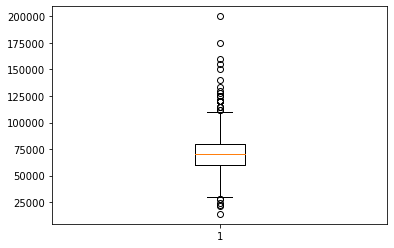

In [67]:
plt.boxplot(df['yearly_brutto_salary_eur_2019'])

In [68]:
scp.trim_mean(df['yearly_brutto_salary_eur_2019'], proportiontocut=0.2)

70406.375

In [69]:
np.mean(df['yearly_brutto_salary_eur_2019'])

72754.90037593985

In [70]:
np.median(df['yearly_brutto_salary_eur_2019'])

70000.0

In [71]:
df['yearly_bonus_eur_2019'].unique()

array([ 1000,     0,  4000,  5500,  6000,  6500, 16000,  2000,  4650,
        9000, 13000,   200, 10000, 10500,  3800,  3000,  2500, 12000,
       80000,  5000,  8000, 11000,  3060,  1500,  7900, 25000,  4800,
           1,  6800,  7800, 15000,  7000, 37000, 36000, 14000,  6700,
        1400,  6250,  9600,  7500, 19000,    10, 20000,  7200,  5300,
       43000, 55000,  3200,  8900,   300, 13500,  4500,  4170,  8500,
       28000, 30000,  3300, 11400, 17000, 18000,  1200,  4300,  8800])

In [72]:
df['yearly_bonus_eur_2019'].value_counts()

0        304
5000      34
3000      21
10000     18
6000      12
        ... 
6700       1
36000      1
37000      1
7900       1
8800       1
Name: yearly_bonus_eur_2019, Length: 63, dtype: int64

In [73]:
np.median(df['yearly_bonus_eur_2019'])

0.0

{'whiskers': [<matplotlib.lines.Line2D at 0x22b4d899100>,
 'caps': [<matplotlib.lines.Line2D at 0x22b4d899850>,
 'boxes': [<matplotlib.lines.Line2D at 0x22b4d88ce80>],
 'medians': [<matplotlib.lines.Line2D at 0x22b4d899f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x22b4d8a8340>],
 'means': []}

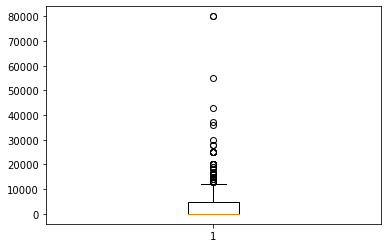

In [74]:
plt.boxplot(df['yearly_bonus_eur_2019'])

In [75]:
np.median(df['yearly_stocks'])

0.0

In [76]:
np.mean(df['yearly_brutto_salary_eur_2018'])

65558.26879699249

In [77]:
np.median(df['yearly_brutto_salary_eur_2018'])

65000.0

In [78]:
np.median(df['yearly_bonus_eur_2018'])

0.0

In [79]:
np.median(df['yearly_stocks_2018'])

0.0

{'whiskers': [<matplotlib.lines.Line2D at 0x22b4d913a00>,
 'caps': [<matplotlib.lines.Line2D at 0x22b4d921040>,
 'boxes': [<matplotlib.lines.Line2D at 0x22b4d913670>],
 'medians': [<matplotlib.lines.Line2D at 0x22b4d921760>],
 'fliers': [<matplotlib.lines.Line2D at 0x22b4d921af0>],
 'means': []}

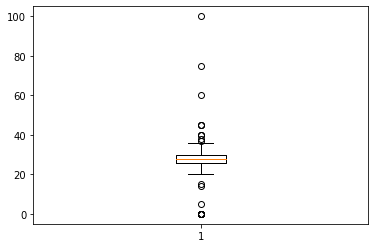

In [80]:
plt.boxplot(df['vacation_days'])

In [81]:
np.median(df['vacation_days'])

28.0

In [82]:
np.mean(df['vacation_days'])

27.795112781954888

{'whiskers': [<matplotlib.lines.Line2D at 0x22b4d971760>,
 'caps': [<matplotlib.lines.Line2D at 0x22b4d971e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x22b4d9713d0>],
 'medians': [<matplotlib.lines.Line2D at 0x22b4d9785e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22b4d978970>],
 'means': []}

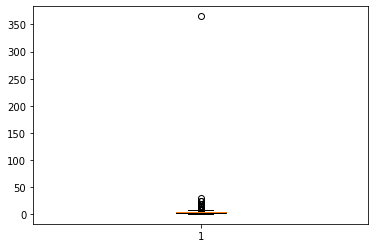

In [83]:
plt.boxplot(df['home_office_days_monthly'])

In [84]:
np.median(df['home_office_days_monthly'])

4.0

## Estimates of variability

In [85]:
df.head()

,age,gender,city,seniority,position,experience_years,main_technology,yearly_brutto_salary_eur_2019,yearly_bonus_eur_2019,yearly_stocks,yearly_brutto_salary_eur_2018,yearly_bonus_eur_2018,yearly_stocks_2018,vacation_days,home_office_days_monthly,work_language,company_size,company_type,contract_duration,business_industry
0,33,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000,1000,0.0,58000,1000,0.0,29,4,English,50-100,Startup,unlimited,Tourism
1,29,Male,Berlin,Middle,Backend Developer,3,Python,55000,0,0.0,55000,0,0.0,22,4,English,10-50,Product,unlimited,Scientific Activities
2,32,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000,0,0.0,56000,0,0.0,30,2,English,50-100,Product,unlimited,Automotive
3,33,Male,Berlin,Middle,Machine Learning Engineer,11,Python,80000,0,0.0,75000,0,0.0,27,5,English,1000+,Product,unlimited,Сommerce
4,38,Male,Berlin,Head,Manager,15,Not Relevant,81000,4000,0.0,75000,4000,0.0,30,10,German,100-1000,Product,unlimited,Automotive


In [86]:
np.std(df['age'])

4.805861295027435

In [87]:
np.var(df['age'])

23.096302787042774

In [88]:
np.std(df['experience_years'])

5.033078929957183

In [89]:
np.var(df['experience_years'])

25.33188351517894

In [90]:
np.std(df['yearly_brutto_salary_eur_2019'])

20493.960104354475

In [91]:
np.var(df['yearly_brutto_salary_eur_2019'])

420002400.75887287

In [92]:
df.mad() # median absolute devation

age                                  3.679914
experience_years                     4.031411
yearly_brutto_salary_eur_2019    14362.378251
yearly_bonus_eur_2019             4840.153033
yearly_stocks                     3087.353311
yearly_brutto_salary_eur_2018    14014.912905
yearly_bonus_eur_2018             4840.153033
yearly_stocks_2018                1477.988049
vacation_days                        3.033149
home_office_days_monthly             4.678621
dtype: float64

In [93]:
np.var(df['yearly_brutto_salary_eur_2018'])

410061257.6890268

In [94]:
np.var(df['vacation_days'])

38.606517468483155

In [95]:
np.var(df['home_office_days_monthly'])

270.3513306292047

## Data distribution

In [96]:
df.head()

,age,gender,city,seniority,position,experience_years,main_technology,yearly_brutto_salary_eur_2019,yearly_bonus_eur_2019,yearly_stocks,yearly_brutto_salary_eur_2018,yearly_bonus_eur_2018,yearly_stocks_2018,vacation_days,home_office_days_monthly,work_language,company_size,company_type,contract_duration,business_industry
0,33,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000,1000,0.0,58000,1000,0.0,29,4,English,50-100,Startup,unlimited,Tourism
1,29,Male,Berlin,Middle,Backend Developer,3,Python,55000,0,0.0,55000,0,0.0,22,4,English,10-50,Product,unlimited,Scientific Activities
2,32,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000,0,0.0,56000,0,0.0,30,2,English,50-100,Product,unlimited,Automotive
3,33,Male,Berlin,Middle,Machine Learning Engineer,11,Python,80000,0,0.0,75000,0,0.0,27,5,English,1000+,Product,unlimited,Сommerce
4,38,Male,Berlin,Head,Manager,15,Not Relevant,81000,4000,0.0,75000,4000,0.0,30,10,German,100-1000,Product,unlimited,Automotive


In [97]:
df['experience_years'].min()

0

In [98]:
df['experience_years'].max()

30

<AxesSubplot:xlabel='experience_years', ylabel='Count'>

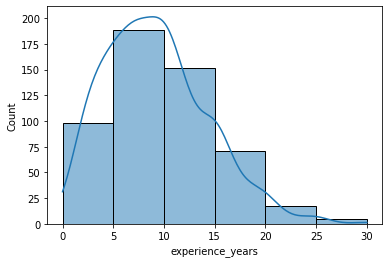

In [99]:
sns.histplot(df['experience_years'], bins = 6, kde = True)

<AxesSubplot:xlabel='yearly_brutto_salary_eur_2019', ylabel='Count'>

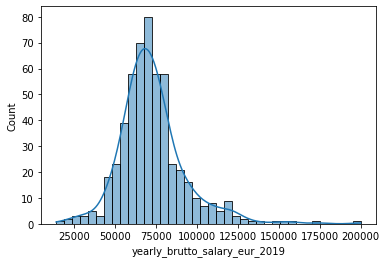

In [100]:
sns.histplot(df['yearly_brutto_salary_eur_2019'], kde = True)

<AxesSubplot:xlabel='yearly_brutto_salary_eur_2018', ylabel='Count'>

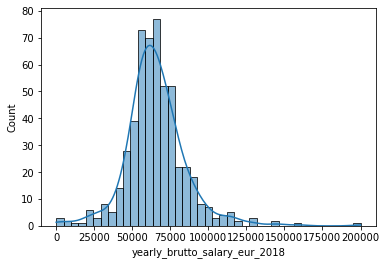

In [101]:
sns.histplot(df['yearly_brutto_salary_eur_2018'], kde = True)

<AxesSubplot:xlabel='count', ylabel='main_technology'>

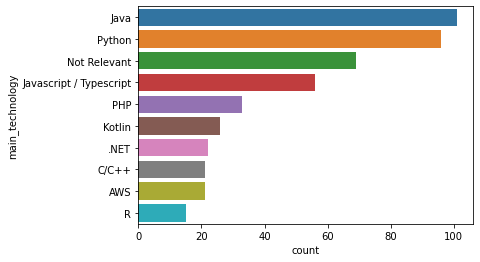

In [102]:
sns.countplot(y = df['main_technology'],
              order = df['main_technology'].value_counts().iloc[:10].index)

<AxesSubplot:xlabel='count', ylabel='city'>

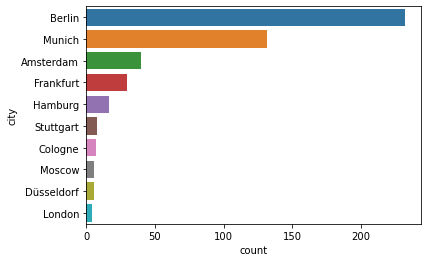

In [103]:
sns.countplot(y = df['city'], 
             order = df['city'].value_counts().iloc[:10].index)

<AxesSubplot:xlabel='gender', ylabel='count'>

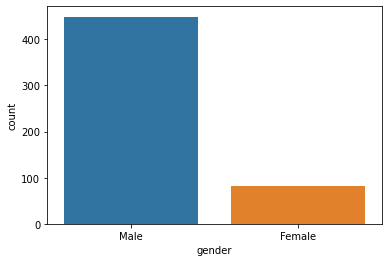

In [104]:
sns.countplot(x = df['gender'])

<AxesSubplot:xlabel='seniority', ylabel='count'>

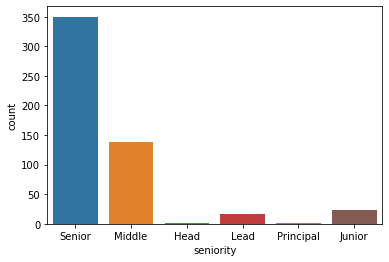

In [105]:
sns.countplot(x = df['seniority'])

<AxesSubplot:xlabel='age', ylabel='Count'>

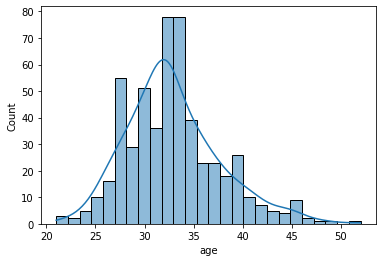

In [106]:
sns.histplot(df['age'], kde = True)

<AxesSubplot:xlabel='count', ylabel='position'>

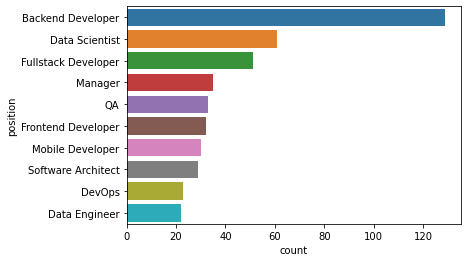

In [111]:
sns.countplot(y = df['position'], order = df['position'].value_counts().iloc[:10].index)

<AxesSubplot:xlabel='vacation_days', ylabel='Count'>

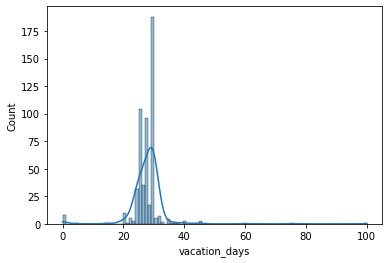

In [112]:
sns.histplot(df['vacation_days'], kde = True)

C:\Users\jsmvk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_office_days_monthly'>

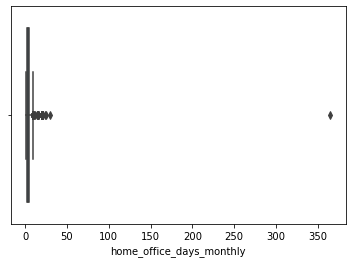

In [117]:
sns.boxplot(df['home_office_days_monthly'])

C:\Users\jsmvk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_language', ylabel='count'>

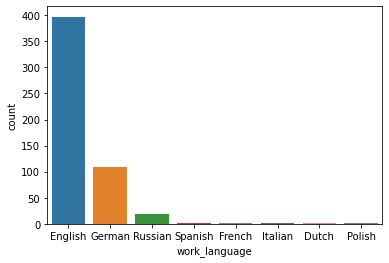

In [118]:
sns.countplot(df['work_language'])

C:\Users\jsmvk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='company_size', ylabel='count'>

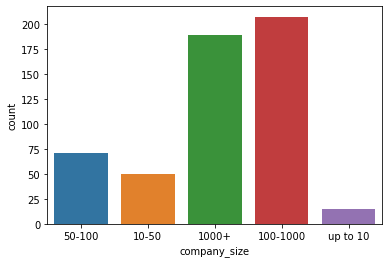

In [124]:
sns.countplot(df['company_size'])

<AxesSubplot:xlabel='count', ylabel='company_type'>

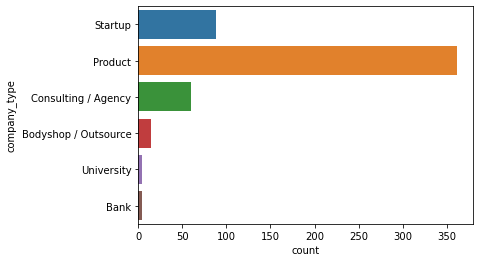

In [126]:
sns.countplot(y = df['company_type'])

<AxesSubplot:xlabel='count', ylabel='contract_duration'>

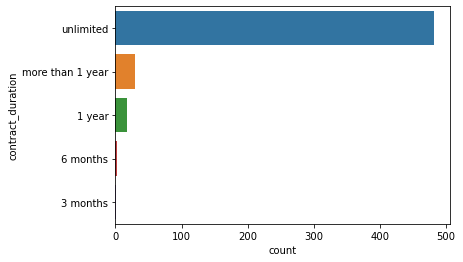

In [128]:
sns.countplot(y = df['contract_duration'])

<AxesSubplot:xlabel='count', ylabel='business_industry'>

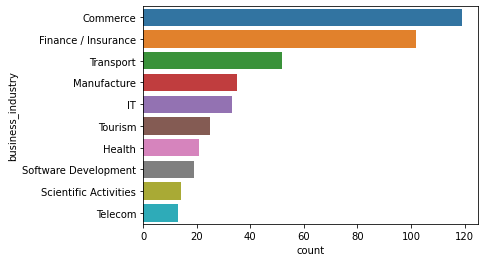

In [137]:
sns.countplot(y = df['business_industry'], order = df['business_industry'].value_counts().iloc[:10].index)

<AxesSubplot:xlabel='yearly_stocks', ylabel='Count'>

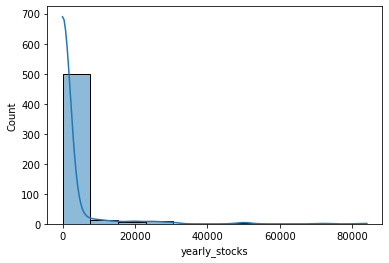

In [138]:
sns.histplot(df['yearly_stocks'], kde = True)

<AxesSubplot:xlabel='yearly_stocks_2018', ylabel='Count'>

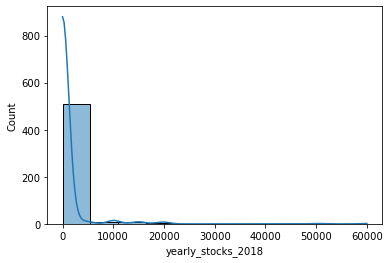

In [140]:
sns.histplot(df['yearly_stocks_2018'], kde = True)

<AxesSubplot:xlabel='yearly_bonus_eur_2018', ylabel='Count'>

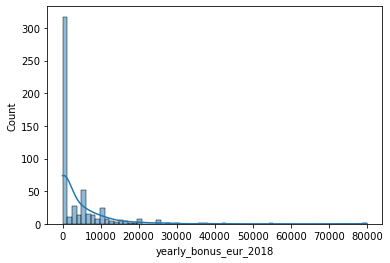

In [142]:
sns.histplot(df['yearly_bonus_eur_2018'], kde = True)

<AxesSubplot:xlabel='yearly_bonus_eur_2019', ylabel='Count'>

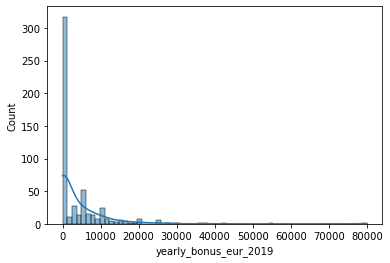

In [143]:
sns.histplot(df['yearly_bonus_eur_2019'], kde = True)